In [8]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

In [9]:
cols = list(pd.read_csv("net_aigenerated_data_wav2vec_performance_stu.csv", nrows=1))
print(cols)

net_aigenerated_data_wav2vec = pd.read_csv('/projectnb/ds549/projects/AImpower/evaluation-wav2vec/net_aigenerated_data_wav2vec_performance_stu.csv', delimiter=',', usecols =[i for i in cols if "Unnamed:" not in i])

['Unnamed: 0', 'Filename', 'Start_time', 'End_time', 'Wav2vec', 'WER', 'Stutterance_Count', 'NA_Count', 'NA_Cleaned_Count', 'WER_Binned', 'rouge1-precision', 'rouge1-recall', 'rouge1-f1', 'rouge2-precision', 'rouge2-recall', 'rouge2-f1', 'rougel-precision', 'rougel-recall', 'rougel-f1', 'Cleaned_Transcript', 'GroundTruth_Transcript']


In [10]:
net_aigenerated_data_wav2vec['Duration'] = net_aigenerated_data_wav2vec['End_time'] - net_aigenerated_data_wav2vec['Start_time']

(0.0, 20.0)

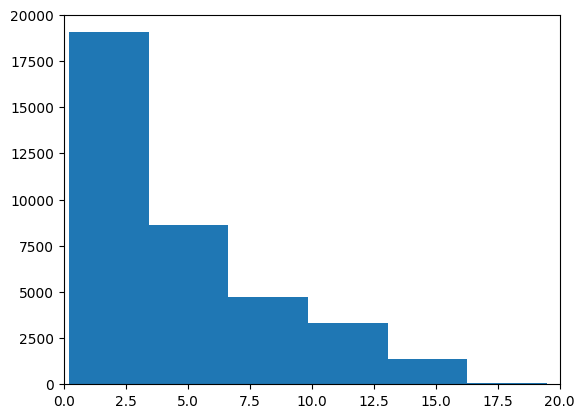

In [11]:
plt.hist(net_aigenerated_data_wav2vec['Duration'])
plt.gca().set_xlim(0, 20)

In [12]:
len(net_aigenerated_data_wav2vec)

37253

In [13]:
data_short = net_aigenerated_data_wav2vec[net_aigenerated_data_wav2vec['Duration']<5]

In [14]:
len(data_short)

24319

In [15]:
data_short['WER'].describe()
data_short_unnormal_WER = data_short[data_short['WER']>0.5]

In [23]:
data_high_WER = data_short[data_short['WER'] == data_short['WER'].max()]

In [25]:
data_high_WER[['Filename', 'Start_time', 'End_time', 'Wav2vec', 'WER', 'Stutterance_Count', 'Cleaned_Transcript', 'GroundTruth_Transcript', 'Duration']]

,Filename,Start_time,End_time,Wav2vec,WER,Stutterance_Count,Cleaned_Transcript,GroundTruth_Transcript,Duration
1129,D0010_A,1291.240,1292.510,四自自治镇,2.0,2.0,对。,对/r[对对对对]。,1.27
1173,D0010_A,1505.880,1507.720,然好对对组队,2.0,2.0,对。,<overlap>对[对对对]。,1.84
17882,P0010,2152.106,2156.666,出出出出出陈程,2.0,2.0,除尘。,除[除除除除除]尘[尘]。,4.56
17893,P0010,2919.856,2923.426,第一弟地第一音音,2.0,3.0,低音。,低[低低低]音/r[音]。,3.57
18005,P0010,2172.406,2175.126,天七停停停停,2.0,1.0,停。,停[停停停停停]。,2.72
18329,P0011,3521.242,3524.932,阿尔穆阿穆尔穆,2.0,1.0,噩梦。,噩梦[噩梦噩梦]。,3.69


In [45]:
data_short_unnormal_WER_sorted = data_short_unnormal_WER.sort_values(by = 'WER', ascending = False)
data_short_unnormal_WER_sorted
data_short_unnormal_WER_sorted['Cleaned_Transcript'][0:1].str.len()

18329    3
Name: Cleaned_Transcript, dtype: int64

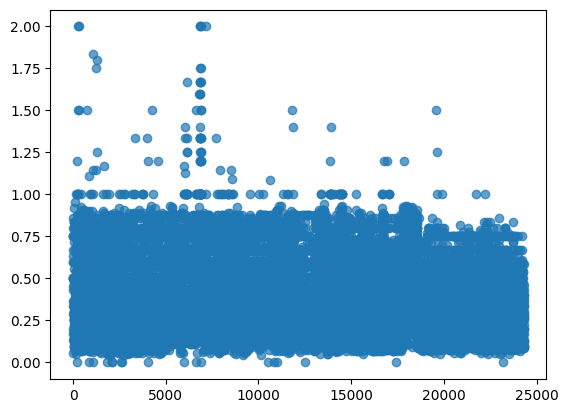

In [16]:
plt.scatter(
    range(0, len(data_short)), 
    data_short["WER"], 
    alpha = 0.7
)

In [26]:
data_medium = net_aigenerated_data_wav2vec[net_aigenerated_data_wav2vec['Duration']>=5]
data_medium = data_medium[net_aigenerated_data_wav2vec['Duration']<10]

/scratch/1227217.1.academic-gpu/ipykernel_2512358/1825170084.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_medium = data_medium[net_aigenerated_data_wav2vec['Duration']<10]


In [27]:
len(data_medium)

8275

In [46]:
data_medium['WER'].describe()
# data_medium[data_medium['WER']>0.5]

count    8266.000000
mean        0.339995
std         0.208081
min         0.000000
25%         0.200000
50%         0.294118
75%         0.421053
max         2.375000
Name: WER, dtype: float64

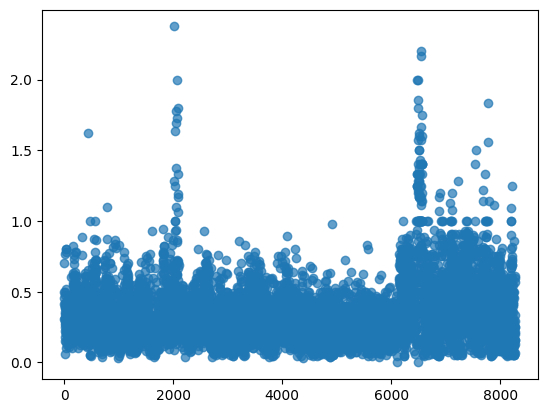

In [28]:
plt.scatter(
    range(0, len(data_medium)), 
    data_medium["WER"], 
    alpha = 0.7
)

In [29]:
data_long = net_aigenerated_data_wav2vec[net_aigenerated_data_wav2vec['Duration']>=10]

In [30]:
len(data_long)

4659

In [47]:
data_long['WER'].describe()
# data_medium[data_medium['WER']>0.5]

count    4657.000000
mean        0.304364
std         0.159360
min         0.042553
25%         0.200000
50%         0.272727
75%         0.366667
max         2.444444
Name: WER, dtype: float64

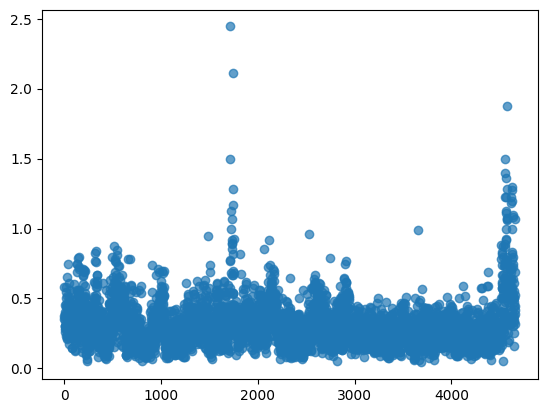

In [31]:
plt.scatter(
    range(0, len(data_long)), 
    data_long["WER"], 
    alpha = 0.7
)

In [ ]:
# summer work: WER's calculation 
WER.append(jiwer.wer(' '.join(jieba.lcut(reference)), ' '.join(jieba.lcut(hypothesis))))

#jieba.lcut:  (default: exact mode)
#jiwer.wer: wer/cer

In [18]:
data = pd.read_csv("processed_Wav2vec_evaluation.csv", index_col=0)
data

,file,start_time,end_time,participant,ground_truth,ground_truth_cleaned,Wav2vec,WER,CER,BLEU,WordNet_first,WordNet_all,GloVe,BERT,Sent2Vec
0,D0001_A,87.970,94.850,1.0,大/r[大]家好，我是叫<姓名>，那。,大家好我是叫姓名那,他他大家好过四教马,1.000000,0.888889,8.166727e-232,0.000000,0.000000,0.574892,0.722581,0.003372
1,D0001_A,95.580,102.830,1.0,我是，今年是，<年龄>岁来自<居住地>，呃/i。,我是今年是年龄岁来自居住地,我是金阳市来,0.750000,0.769231,3.506226e-155,0.540000,0.393662,0.863328,0.654011,0.030484
2,D0001_A,104.090,105.680,1.0,我是。,我是,我讯,1.000000,0.500000,0.000000e+00,0.000000,0.000000,0.000000,0.680235,0.000000
3,D0001_A,106.300,119.120,1.0,资深/p的口/b[口/r/b]吃患者。,资深的口吃患者,兹森的考考兹汉者,0.750000,0.857143,1.288230e-231,0.000000,0.000000,0.809622,0.652364,0.008487
4,D0001_A,119.130,124.490,1.0,我是从小就有口吃。,我是从小就有口吃,是从小就有口吃,0.166667,0.125000,8.187308e-01,0.455357,0.434133,0.967717,0.955753,0.003261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37249,P0070,2586.616,2589.346,70.0,单曲循环歌曲这样而已。,单曲循环歌曲这样而已,单曲循环歌曲这样而已,0.000000,0.000000,1.000000e+00,0.590909,0.328736,1.000000,1.000000,0.000000
37250,P0070,2782.496,2783.706,70.0,杨幂的电影。,杨幂的电影,杨幂的电影,0.000000,0.000000,1.221339e-77,1.000000,1.000000,1.000000,1.000000,0.000000
37251,P0070,2995.296,2998.116,70.0,你好，米雅，今天柴油价怎么样。,你好米雅今天柴油价怎么样,你好米亚今天柴油价怎么样,0.166667,0.083333,5.372850e-01,0.552632,0.469922,1.000000,0.984013,0.000000
37252,P0070,2604.066,2606.656,70.0,单曲循环歌曲琉璃光之歌。,单曲循环歌曲琉璃光之歌,单曲循环歌曲刘离光之歌,0.200000,0.181818,7.380245e-78,0.590909,0.328736,1.000000,0.953788,0.000000


In [57]:
!pip install jieba
!pip install jiwer

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for jiwer from https://files.pythonhosted.org/packages/dc/7f/00bec152973661ea89628490367fa3058d7f56d51d2c1ad02a44589d12cd/jiwer-3.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for rapidfuzz<4,>=3 from https://files.pythonhosted.org/packages/50/7d/8ff52a37beb75874b733ae3197345479b53a112ba504b8d8e4ea8f48467e/rapidfuzz-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.8 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the pack

In [19]:
data['WER'].describe()

count    36634.000000
mean         0.510310
std          0.464291
min          0.000000
25%          0.200000
50%          0.428571
75%          0.714286
max          8.000000
Name: WER, dtype: float64

In [21]:
data[data['ground_truth_cleaned']=="所以的话其实总结下来就是说是在一些比较正式的场合需要汇报工作全场都只在听你那边说话的时候"]

,file,start_time,end_time,participant,ground_truth,ground_truth_cleaned,Wav2vec,WER,CER,BLEU,WordNet_first,WordNet_all,GloVe,BERT,Sent2Vec
2441,D0020_A,923.92,936.76,20.0,所以的话其实总结下来就是说是在一些比较，正式的场合需要/p汇报工作，全场都只在听你/p那边说...,所以的话其实总结下来就是说是在一些比较正式的场合需要汇报工作全场都只在听你那边说话的时候,所谓的话其实总结下来就是说是在一些比较正式的场合需要汇报工作全场都只在听你里边说话的时候,0.08,0.045455,0.846666,0.339297,0.29567,0.99371,0.983709,0.000252


(array([6.082e+03, 2.647e+03, 4.402e+03, 3.801e+03, 2.732e+03, 5.396e+03,
        2.272e+03, 1.330e+03, 1.182e+03, 7.400e+01, 4.662e+03, 1.630e+02,
        1.420e+02, 2.660e+02, 6.000e+00, 4.970e+02, 1.080e+02, 2.600e+01,
        8.000e+00, 0.000e+00, 6.130e+02, 1.000e+00, 5.000e+00, 9.000e+00,
        0.000e+00, 3.200e+01, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.280e+02, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4]),
 <BarContainer object of 34 artists>)

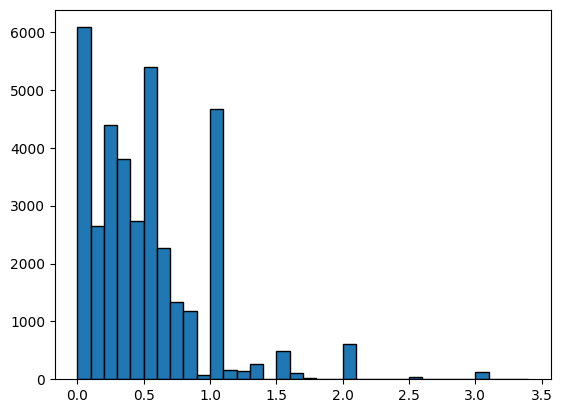

In [65]:
plt.hist(data['WER'], bins=np.arange(0,3.5, 0.1), edgecolor='black')

In [66]:
data_low_CER = data[data['CER']<0.2]
da

,file,start_time,end_time,participant,ground_truth,ground_truth_cleaned,Wav2vec,WER,CER,BLEU,WordNet_first,WordNet_all,GloVe,BERT,Sent2Vec
4,D0001_A,119.130,124.490,1.0,我是从小就有口吃。,我是从小就有口吃,是从小就有口吃,0.166667,0.125000,8.187308e-01,0.455357,0.434133,0.967717,0.955753,0.003261
7,D0001_A,142.720,149.500,1.0,现在我已经工/r/b作了，嗯/i/p。,现在我已经工作了,现在我已经工作了,0.000000,0.000000,1.000000e+00,0.666667,0.427335,1.000000,1.000000,0.000000
16,D0001_A,274.390,291.690,1.0,特别是我给他们讲故事的时候，比如说讲到，大/b灰狼来了，然后这个大字就是我的难发音，然后就会卡住。,特别是我给他们讲故事的时候比如说讲到大灰狼来了然后这个大字就是我的难发音然后就会卡住,特别是我给他们讲故事的时候别说讲到大圭兰来了然后这个大字就是我的拿发人然后就会卡坐,0.346154,0.166667,5.348717e-01,0.337512,0.340333,0.989666,0.954492,0.002104
17,D0001_A,291.950,311.960,1.0,那孩/r/p子就会那个兴趣，就突然间就被我嗯/i就是突然间就中断了的那种感觉，那孩/r/p子...,那孩子就会那个兴趣就突然间就被我就是突然间就中断了的那种感觉那孩子他会觉得好奇,那孩子就会那个兴趣又突然间就被我就是突间就踪过了对那种感觉那孩子他他会觉得好奇,0.307692,0.153846,4.644532e-01,0.424512,0.284787,0.976614,0.968296,0.000479
21,D0001_A,363.190,380.220,1.0,就是嗯/i不会说呃/i特意来[来]模仿我的这个卡壳的事情，因为他们不/b会想到我是讲话有问题。,就是不会说特意来模仿我的这个卡壳的事情因为他们不会想到我是讲话有问题,这是不会说破买来模法我的这个塔的事情因为他们不会想到我是讲话有问题,0.285714,0.176471,5.642865e-01,0.313369,0.313096,0.991946,0.946591,0.001613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37246,P0070,2258.176,2260.806,70.0,导航去杨屋中心市场。,导航去杨屋中心市场,导航去洋屋中心市场,0.400000,0.111111,8.214547e-155,0.541005,0.379974,0.883762,0.978462,0.000000
37249,P0070,2586.616,2589.346,70.0,单曲循环歌曲这样而已。,单曲循环歌曲这样而已,单曲循环歌曲这样而已,0.000000,0.000000,1.000000e+00,0.590909,0.328736,1.000000,1.000000,0.000000
37250,P0070,2782.496,2783.706,70.0,杨幂的电影。,杨幂的电影,杨幂的电影,0.000000,0.000000,1.221339e-77,1.000000,1.000000,1.000000,1.000000,0.000000
37251,P0070,2995.296,2998.116,70.0,你好，米雅，今天柴油价怎么样。,你好米雅今天柴油价怎么样,你好米亚今天柴油价怎么样,0.166667,0.083333,5.372850e-01,0.552632,0.469922,1.000000,0.984013,0.000000


In [6]:
import pandas as pd
data_wav2vec = pd.read_csv('net_aigenerated_data_wav2vec_performance_stu.csv', delimiter=',')
dat
# data_wav2vec = data_wav2vec[['Filename', 'Start_time', 'End_time', 'Stutterance_Count']]


,Unnamed: 0,Filename,Start_time,End_time,Wav2vec,WER,Stutterance_Count,NA_Count,NA_Cleaned_Count,WER_Binned,...,rouge1-recall,rouge1-f1,rouge2-precision,rouge2-recall,rouge2-f1,rougel-precision,rougel-recall,rougel-f1,Cleaned_Transcript,GroundTruth_Transcript
0,0,D0001_A,2081.540000,2109.650000,我说出了就比较需要时间然后那识别了他的不就是他的一会那个话还没说完的描说出来的话它就取消不就...,0.350515,1.0,589,0,0.35,...,0.684211,0.702703,0.346939,0.278689,0.309091,0.648148,0.500000,0.564516,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,我说出来就比较的需要时间，哦，然后那个嗯/i识别的它的就是它等你一会儿，你那个话还没有说完，...
1,1,D0001_A,790.130000,796.580000,四治表我尔说的法,0.700000,1.0,589,0,0.70,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,电视剧有，我说的话。,电视剧有，我/r说的话。
2,2,D0001_A,1562.083518,1586.220000,这部剧是不怎么评中不怎么好的就而论区的那那县人他们都在说拿号作朝惨的那个就那么请奋但是就是了...,0.375000,10.0,589,0,0.38,...,0.548387,0.557377,0.352941,0.300000,0.324324,0.600000,0.500000,0.545455,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,这/b部剧是不怎么，评分是不怎么好的，呃/i就因为呃/i评/r/b论区的那[那]些人，他们都...
3,3,D0001_A,2016.780000,2035.673559,很金转和训非女婴还是讯本一助手来的就就我记的他是叫迅菲我之前甲就是他,0.578947,7.0,589,0,0.58,...,0.500000,0.487805,0.208333,0.178571,0.192308,0.440000,0.354839,0.392857,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,很[很/b]精准，对，呃/i讯飞语音还是讯飞助手来着，就[就]我记得它是叫讯/r飞，我之前就...
4,4,D0001_A,1682.670000,1709.110000,一个那个是你较扎来的果望了是出现了与一个人然后了他他就这了一把健然后就交瓦那个拿二奥给早萨尔...,0.455882,8.0,589,0,0.46,...,0.454545,0.476190,0.179487,0.159091,0.168675,0.550000,0.448980,0.494382,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,一个那个是嗯/i叫啥来着，我忘了，就是出现了另/r/b一个人，然后呢他[他]就射/p了一把剑...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37248,37248,P0070,2586.616000,2589.346000,单曲循环歌曲这样而已,0.090909,0.0,589,0,0.09,...,0.833333,0.909091,1.000000,0.800000,0.888889,1.000000,0.833333,0.909091,单曲循环歌曲这样而已。,单曲循环歌曲这样而已。
37249,37249,P0070,2782.496000,2783.706000,杨幂的电影,0.166667,0.0,589,0,0.17,...,0.750000,0.857143,1.000000,0.666667,0.800000,1.000000,0.750000,0.857143,杨幂的电影。,杨幂的电影。
37250,37250,P0070,2995.296000,2998.116000,你好米亚今天柴油价怎么样,0.266667,0.0,589,0,0.27,...,0.625000,0.714286,0.600000,0.375000,0.461538,0.833333,0.555556,0.666667,你好，米雅，今天柴油价怎么样。,你好，米雅，今天柴油价怎么样。
37251,37251,P0070,2604.066000,2606.656000,单曲循环歌曲刘离光之歌,0.250000,0.0,589,0,0.25,...,0.666667,0.727273,0.500000,0.400000,0.444444,0.800000,0.666667,0.727273,单曲循环歌曲琉璃光之歌。,单曲循环歌曲琉璃光之歌。
